# Hackathon 1
## Abigail Buckley

In [1]:
#copied and pasted the first cell from the data_visualization notebook with all the import statements

#visualization tools
import matplotlib.pyplot as plt #matplotlib is a basic plotting library
import seaborn as sns #seaborn is a library that uses matplotlib to make styled plots
import plotly_express as px #plotly express is a library for drawing interactive figures
import hypertools as hyp #hypertools is a library for visualizing "high-dimensional" data

#data wrangling tools
import pandas as pd
import numpy as np

%matplotlib inline


/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning:

Could not switch backend to TkAgg.  This may impact performance of the plotting functions.



# Read in the data and view

In [2]:
#read in all the sleep and activity data by month

sleep_data = pd.read_csv('fitbit_export_20190424.csv')
sleep_data = pd.DataFrame(sleep_data)

summary_data = pd.read_excel('fitbit summary.xlsx')
summary_data = pd.DataFrame(summary_data)

april_summary = pd.read_excel('fitbit summary April.xlsx')
april_summary = pd.DataFrame(april_summary)

september_summary = pd.read_excel('september summary.xlsx')
september_summary = pd.DataFrame(september_summary)

october_summary = pd.read_excel('october summary.xlsx')
october_summary = pd.DataFrame(october_summary)

november_summary = pd.read_excel('november summary.xlsx')
november_summary = pd.DataFrame(november_summary)

september_sleep = pd.read_excel('september sleep.xlsx')
september_sleep = pd.DataFrame(september_sleep)

october_sleep = pd.read_excel('october sleep.xlsx')
october_sleep = pd.DataFrame(october_sleep)

november_sleep = pd.read_excel('november sleep.xlsx')
november_sleep = pd.DataFrame(november_sleep)

In [3]:
#March sleep data

sleep_data.head(15)

,,,,,,,,Sleep
Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
2019-03-31 12:54AM,2019-03-31 9:13AM,483,16,1,499,NaN,NaN,NaN
2019-03-30 12:56AM,2019-03-30 9:59AM,532,11,1,543,NaN,NaN,NaN
2019-03-28 10:55PM,2019-03-29 8:41AM,557,29,1,586,NaN,NaN,NaN
2019-03-28 2:10AM,2019-03-28 8:25AM,366,9,0,375,NaN,NaN,NaN
2019-03-26 11:35PM,2019-03-27 8:02AM,494,11,0,506,NaN,NaN,NaN
2019-03-22 9:43AM,2019-03-22 4:58PM,420,15,1,435,NaN,NaN,NaN
2019-03-20 11:18PM,2019-03-21 8:38AM,521,35,3,560,NaN,NaN,NaN
2019-03-19 11:25PM,2019-03-20 8:43AM,516,41,3,558,NaN,NaN,NaN
2019-03-18 10:04PM,2019-03-19 7:43AM,559,19,2,578,NaN,NaN,NaN


In [4]:
#March activity data

summary_data.head()


,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2019-03-01,2005,10325,4.57,0,797,202,11,9,845
1,2019-03-02,1836,7140,3.06,0,927,152,10,22,640
2,2019-03-03,1816,7409,3.23,0,787,128,6,21,595
3,2019-03-04,1947,8987,3.91,0,724,204,1,11,781
4,2019-03-05,1997,10355,4.86,0,751,168,10,19,814


In [5]:
#April activity data

april_summary.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2019-04-01,"2,538","19,803",9.30,0,659,200,32,92,"1,473"
1,2019-04-02,"2,133","13,113",5.87,0,699,167,29,45,991
2,2019-04-03,"2,400","17,844",7.85,0,639,200,34,76,"1,321"
3,2019-04-04,"2,020","10,053",4.70,0,721,188,8,28,856
4,2019-04-05,"1,939","9,119",4.07,0,751,177,8,18,760


# The March and April activity data were formatted differently and therefore couldn't be combined and analyzed. I reformatted the Calories Burned, Steps, and Activity Calories in April by removing commas in the numbers

In [6]:
#need to fix this

summary_data['Date'] = pd.to_datetime(summary_data['Date'])

april_summary['Date'] = pd.to_datetime(april_summary['Date'])
april_summary['Calories Burned'] = april_summary['Calories Burned'].str.replace(",","").astype(float)
april_summary['Steps'] = april_summary['Steps'].str.replace(",","").astype(float)
april_summary['Activity Calories'] = april_summary['Activity Calories'].str.replace(",","").astype(float)



summary_data = pd.concat([summary_data, april_summary], ignore_index=True)

summary_data = pd.DataFrame(summary_data)

summary_data.head()

#now it is fixed

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2019-03-01,2005.0,10325.0,4.57,0,797,202,11,9,845.0
1,2019-03-02,1836.0,7140.0,3.06,0,927,152,10,22,640.0
2,2019-03-03,1816.0,7409.0,3.23,0,787,128,6,21,595.0
3,2019-03-04,1947.0,8987.0,3.91,0,724,204,1,11,781.0
4,2019-03-05,1997.0,10355.0,4.86,0,751,168,10,19,814.0


# I started looking at general trends in the past two months, mostly time series analysis of physical activity

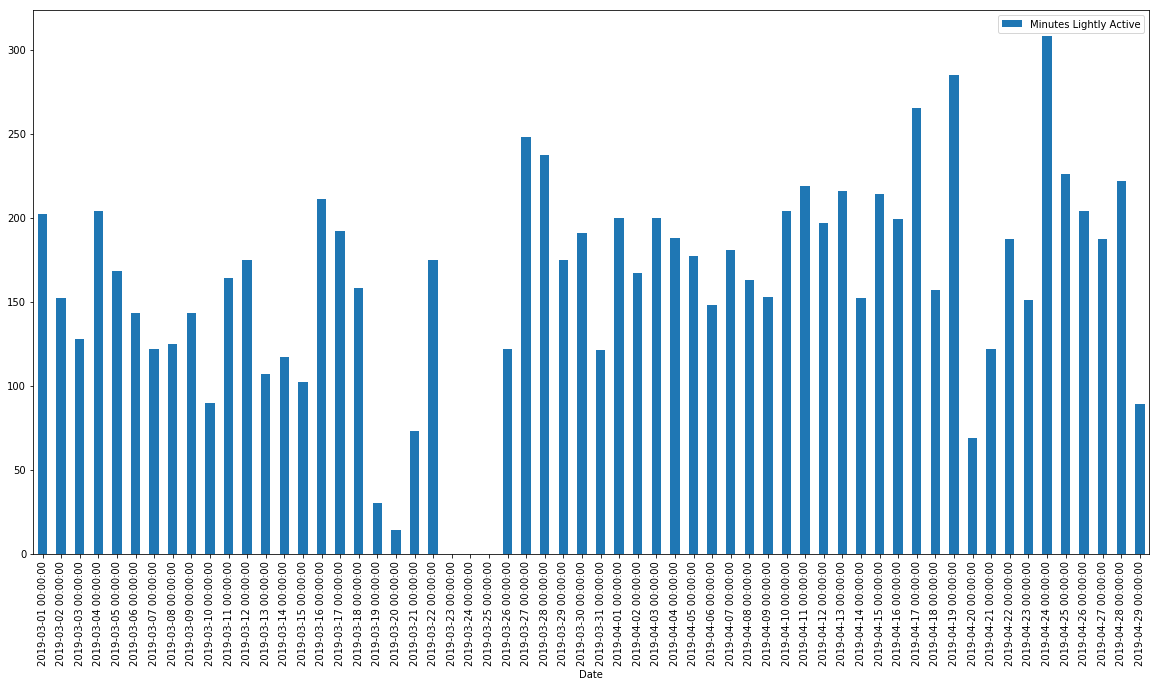

In [7]:
summary_data.plot.bar(x='Date', y='Minutes Lightly Active', figsize=(20,10), fontsize=10)


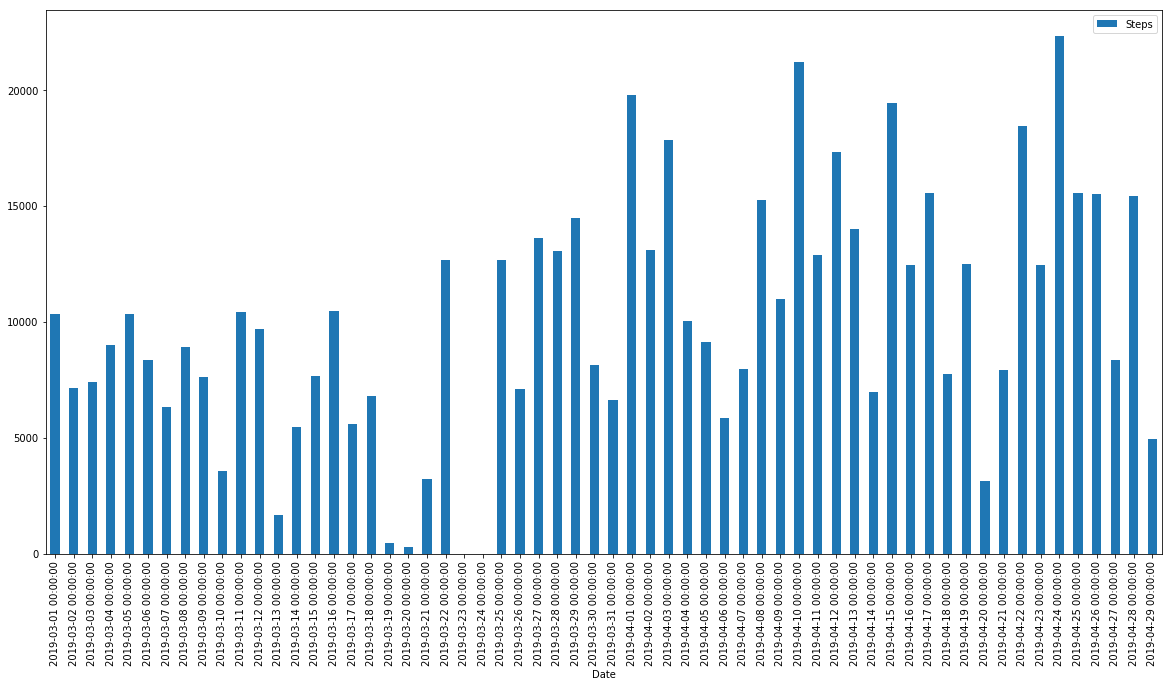

In [8]:
summary_data.plot.bar(x='Date', y='Steps', figsize=(20,10), fontsize=10)


# Next I decided to look at my sleep and activity data from this past fall term. I combined the three months of data into one dataframe.

In [10]:
fall_summary = pd.concat([september_summary, october_summary, november_summary], ignore_index=True)
fall_summary.head(40)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-09-01,2043,10619,4.55,0,694,190,18,53,922
1,2018-09-02,1924,8399,3.60,0,656,204,17,17,773
2,2018-09-03,1415,779,0.33,0,1096,41,0,0,109
3,2018-09-04,1947,8896,3.81,0,616,205,12,27,815
4,2018-09-05,1721,5274,2.26,0,708,124,13,17,500
5,2018-09-06,1800,4694,2.01,0,707,247,0,0,657
6,2018-09-07,1885,8186,3.51,0,652,155,29,25,717
7,2018-09-08,1979,8168,3.50,0,620,295,10,3,904
8,2018-09-09,1904,6784,2.91,0,704,259,11,0,781
9,2018-09-10,1980,8197,3.54,0,627,274,9,11,884


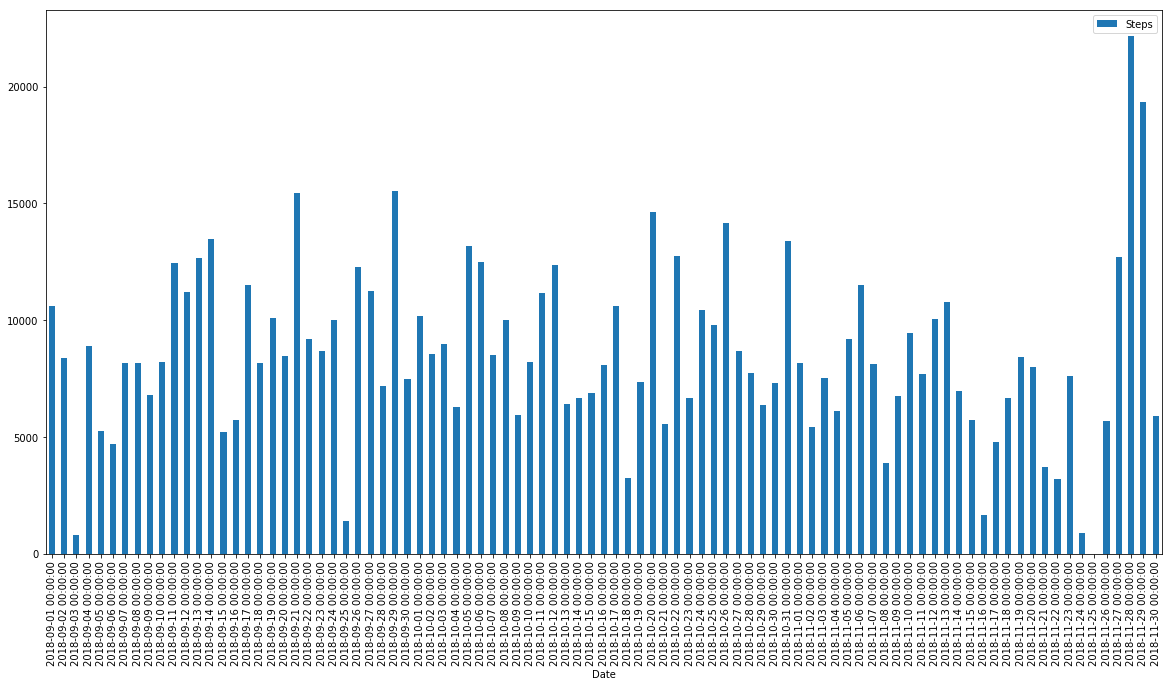

In [11]:
# a simple summary of steps over time

fall_summary.plot.bar(x='Date', y='Steps', figsize=(20,10), fontsize=10)


# To look at my fall sleep data, I had to do some data cleaning as the Start Time coljumn wasn't in a readable date-time format and the combined dataframe was in opposite chronological order

In [12]:
fall_sleep = pd.concat([september_sleep, october_sleep, november_sleep], ignore_index=True)
fall_sleep['Start Time'] = pd.to_datetime(fall_sleep['Start Time'])
fall_sleep.sort_values(by='Start Time', inplace=True)
fall_sleep.head(45)

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
29,2018-09-01 00:46:00,2018-09-01 8:45AM,432,47,1,479,NaN,NaN,NaN
28,2018-09-01 23:53:00,2018-09-02 8:55AM,520,21,1,541,NaN,NaN,NaN
27,2018-09-02 23:49:00,2018-09-03 4:18AM,262,7,0,269,NaN,NaN,NaN
26,2018-09-03 23:14:00,2018-09-04 8:05AM,502,28,2,530,NaN,NaN,NaN
25,2018-09-04 22:25:00,2018-09-05 7:54AM,539,30,1,569,NaN,NaN,NaN
24,2018-09-05 22:15:00,2018-09-06 12:02AM,89,17,0,106,NaN,NaN,NaN
23,2018-09-06 02:21:00,2018-09-06 8:09AM,328,20,1,348,NaN,NaN,NaN
22,2018-09-06 21:43:00,2018-09-07 7:56AM,565,48,0,613,NaN,NaN,NaN
21,2018-09-07 22:16:00,2018-09-08 7:13AM,514,22,0,536,NaN,NaN,NaN
20,2018-09-08 22:41:00,2018-09-09 7:26AM,508,17,1,525,NaN,NaN,NaN


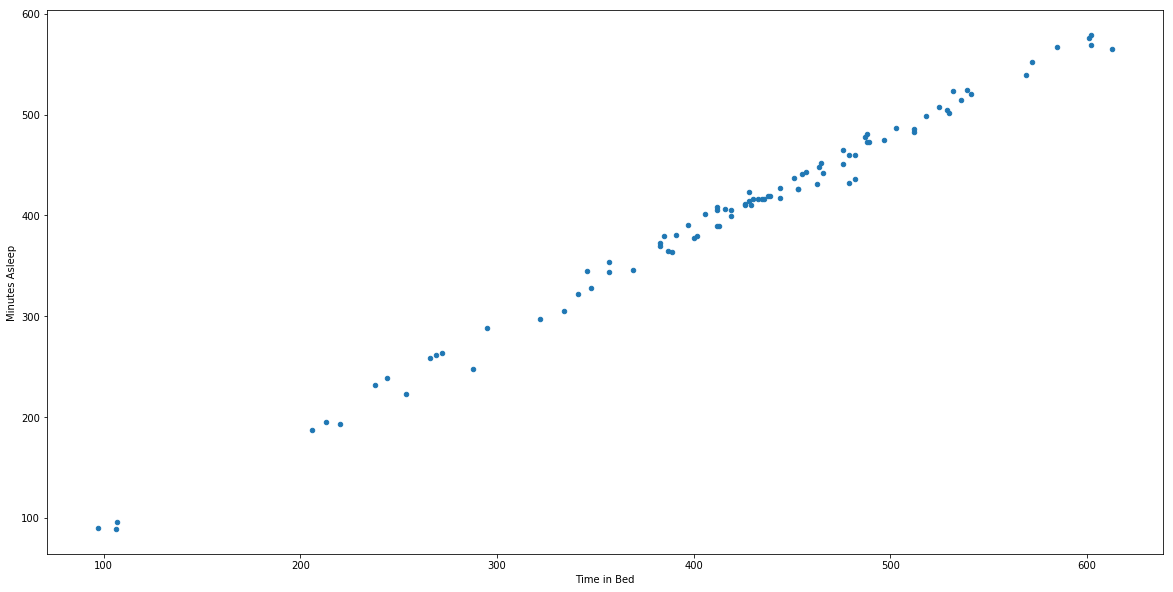

In [13]:
#as expected, strong correlation between time asleep and time in bed

fall_sleep.plot.scatter(x='Time in Bed', y='Minutes Asleep', figsize=(20,10), fontsize=10)


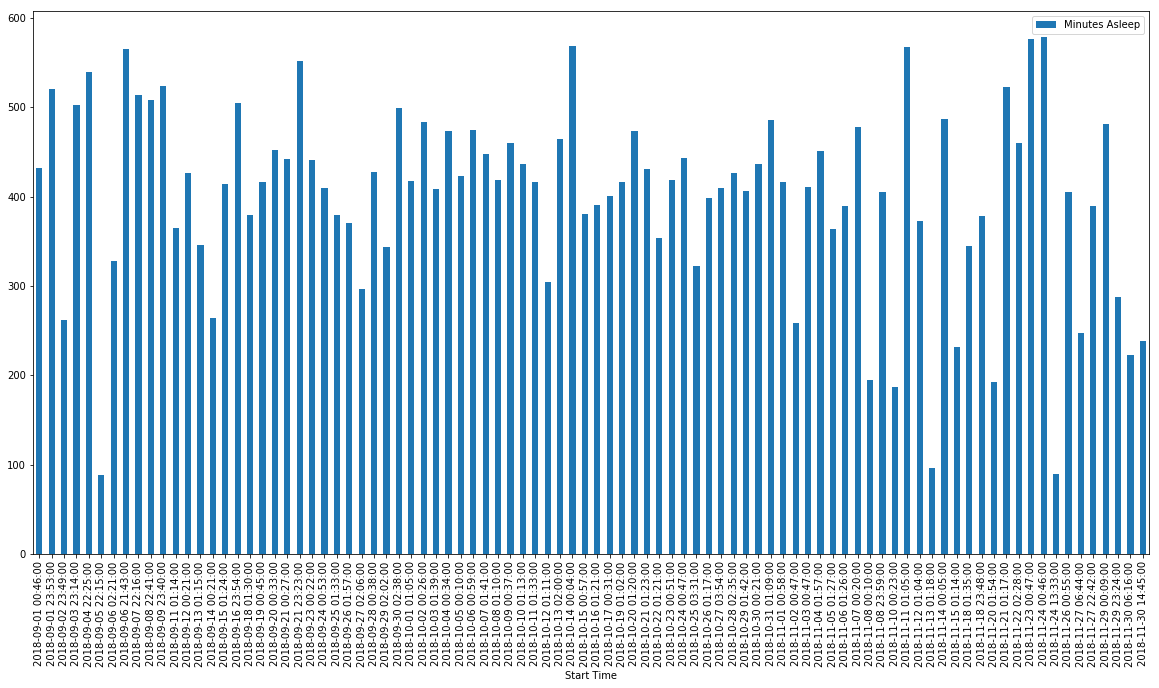

In [14]:
#not much of a relationship between when I went to bed and how long I stayed asleep

fall_sleep.plot.bar(x='Start Time', y='Minutes Asleep', figsize=(20,10), fontsize=10)


# Next I began matching my sleep data with my fall schedule and known assignments, events, etc. 


Text(1032, 460, 'final examinations end')

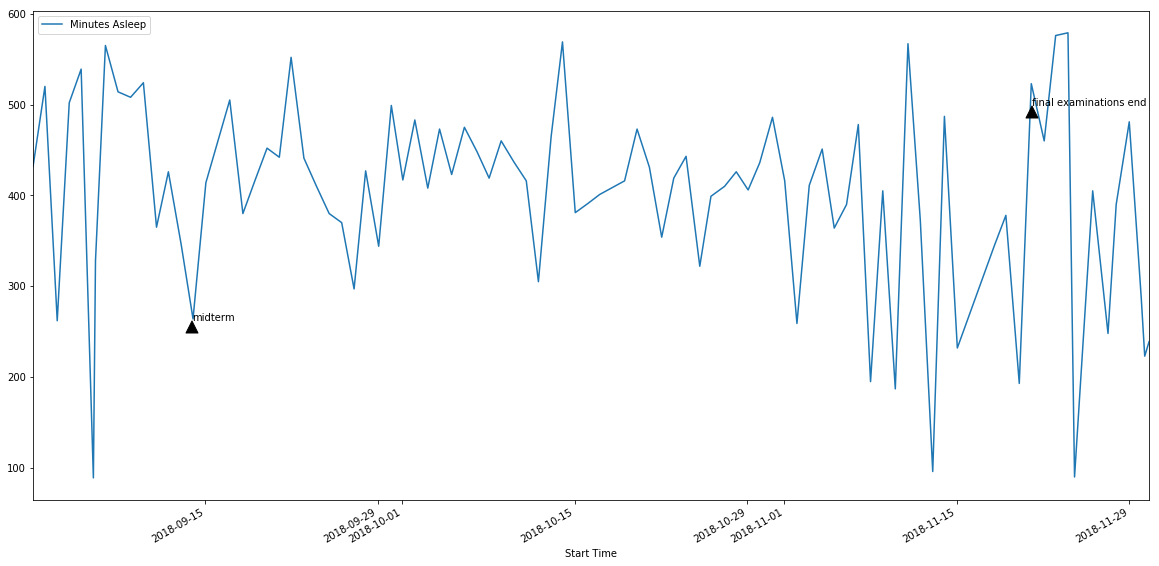

In [35]:
fall_sleep_plot = fall_sleep.plot.line(x='Start Time', y='Minutes Asleep',figsize=(20,10), fontsize=10)
fall_sleep_plot.annotate('midterm', xy=(192, 245), xycoords='figure pixels',
           arrowprops=dict(facecolor='black'),
           )

fall_sleep_plot.annotate('final examinations end', xy=(1032, 460), xycoords='figure pixels',
           arrowprops=dict(facecolor='black'),
           )

#fall_sleep_plot.annotate('Test',
            # (fall_sleep['Start Time'][1], fall_sleep['Minutes Asleep'][1]), 
          #   textcoords='offset points',
            # arrowprops=dict(arrowstyle='-|>'))

# Minimal change in steps over time, just slight decrease over the course of the term followed by some outliers at the beginning of winter break when I was traveling

# Calories Burned, Steps, and Distance all closely related

In [36]:
px.scatter(fall_summary, x="Date", y="Steps", color="Calories Burned", 
           size="Distance", size_max=60, hover_name="Date")

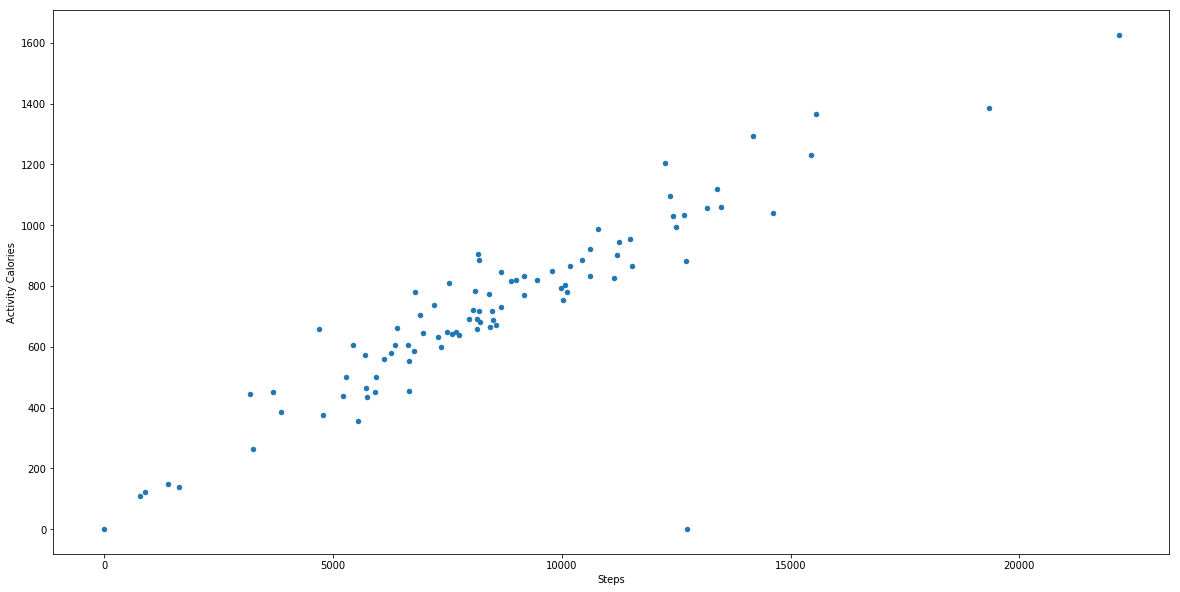

In [17]:
fall_summary.plot.scatter(x='Steps', y='Activity Calories', figsize=(20,10), fontsize=10)


# In both my activity and sleep dataframes, I added a column to track day of the week

In [18]:
#add column for day of week

fall_summary['day_of_week'] = fall_summary['Date'].dt.day_name()
fall_summary.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,day_of_week
0,2018-09-01,2043,10619,4.55,0,694,190,18,53,922,Saturday
1,2018-09-02,1924,8399,3.60,0,656,204,17,17,773,Sunday
2,2018-09-03,1415,779,0.33,0,1096,41,0,0,109,Monday
3,2018-09-04,1947,8896,3.81,0,616,205,12,27,815,Tuesday
4,2018-09-05,1721,5274,2.26,0,708,124,13,17,500,Wednesday


In [19]:
#how to sum up all steps for weekend versus weekdays? sum up the total steps for each day of the week in general?


fall_summed = fall_summary.groupby(['day_of_week'])[['Steps']].sum()
fall_summed = fall_summed.sort_values('Steps', ascending=False)
fall_summed.head()

#fall_summed.plot.bar(x='day_of_week', y='Steps', figsize=(20,10), fontsize=10)


,Steps
day_of_week,
Wednesday,131421
Friday,118749
Saturday,113577
Tuesday,110369
Monday,110078


# I was surprised to see that I have taken the most collective steps on Wednesdays, though it makes sense that Wednesdays, Fridays, and Saturdays are my most active days (as "on" nights) and Sundays are the least active 

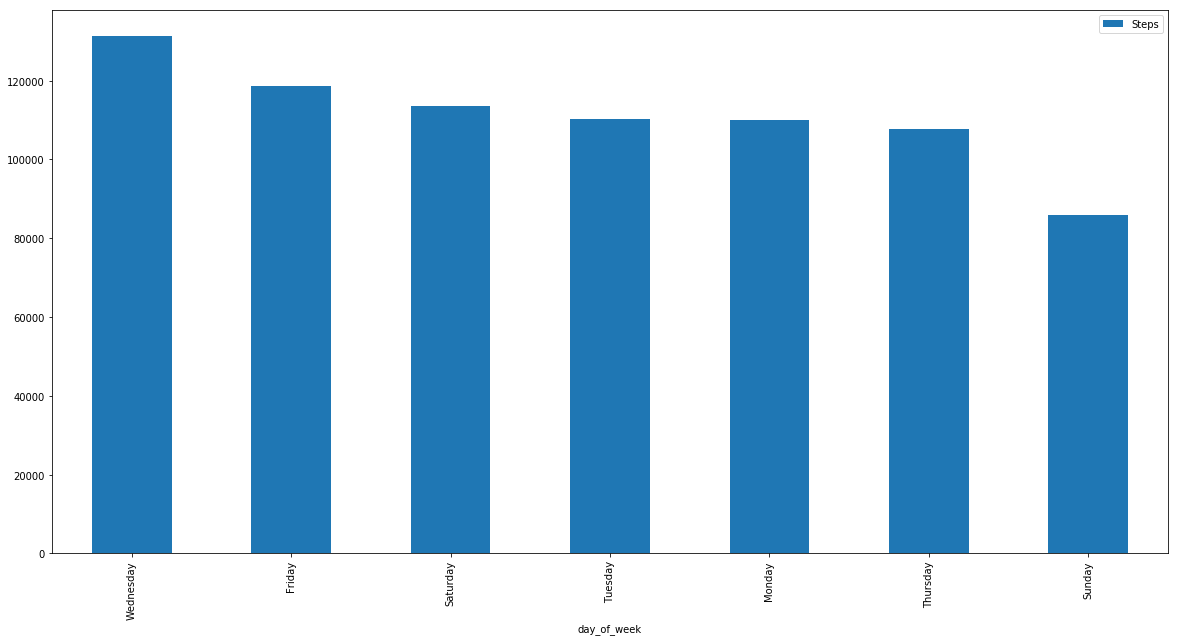

In [20]:
fall_summed.plot.bar(figsize=(20,10), fontsize=10)


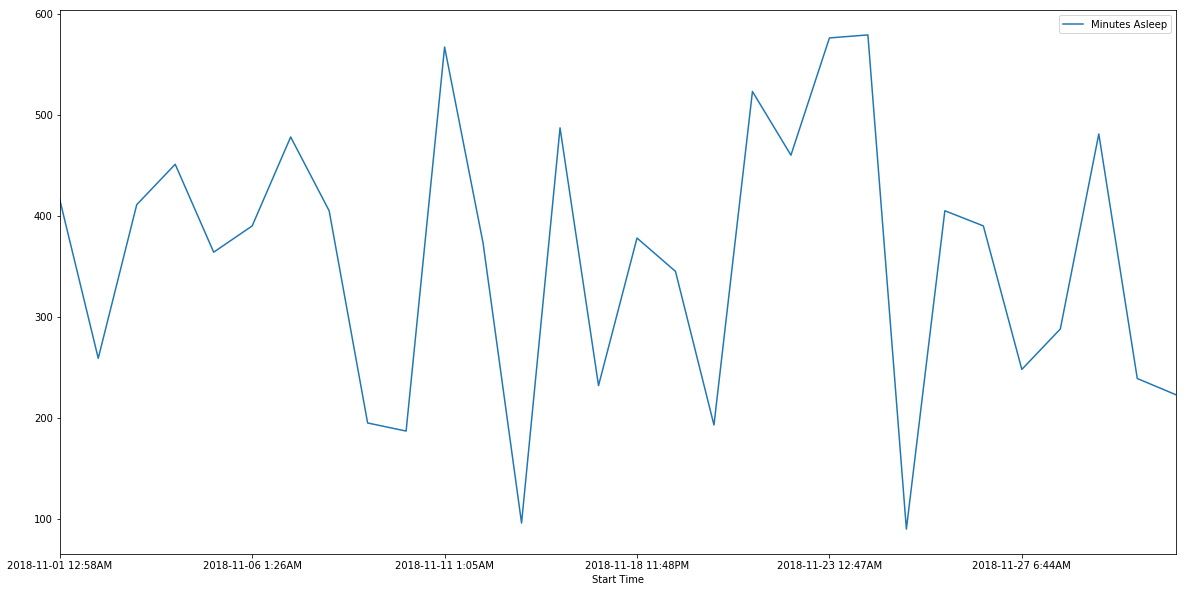

In [21]:
# trying to see if there's a big change in my sleep from finals to break

november_sleep.sort_values(by='Start Time', inplace=True)
november_sleep.plot.line(x='Start Time', y='Minutes Asleep',figsize=(20,10), fontsize=10)

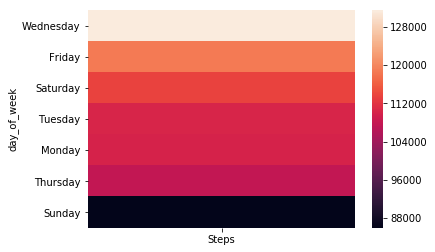

In [22]:
#not sure if I'm using heatmap correctly here

sns.heatmap(fall_summed)

In [23]:
fall_sleep['day_of_week'] = fall_sleep['Start Time'].dt.day_name()
fall_sleep.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,day_of_week
29,2018-09-01 00:46:00,2018-09-01 8:45AM,432,47,1,479,NaN,NaN,NaN,Saturday
28,2018-09-01 23:53:00,2018-09-02 8:55AM,520,21,1,541,NaN,NaN,NaN,Saturday
27,2018-09-02 23:49:00,2018-09-03 4:18AM,262,7,0,269,NaN,NaN,NaN,Sunday
26,2018-09-03 23:14:00,2018-09-04 8:05AM,502,28,2,530,NaN,NaN,NaN,Monday
25,2018-09-04 22:25:00,2018-09-05 7:54AM,539,30,1,569,NaN,NaN,NaN,Tuesday


In [24]:
fall_sleep_sum = fall_sleep.groupby(['day_of_week'])[['Minutes Asleep']].sum()
fall_sleep_sum = fall_sleep_sum.sort_values('Minutes Asleep', ascending=False)
fall_sleep_sum.head()

,Minutes Asleep
day_of_week,
Sunday,5846
Thursday,5676
Saturday,5308
Tuesday,5170
Friday,5039


# I've gotten the most collective sleep on Sundays and the least on Mondays; makes sense

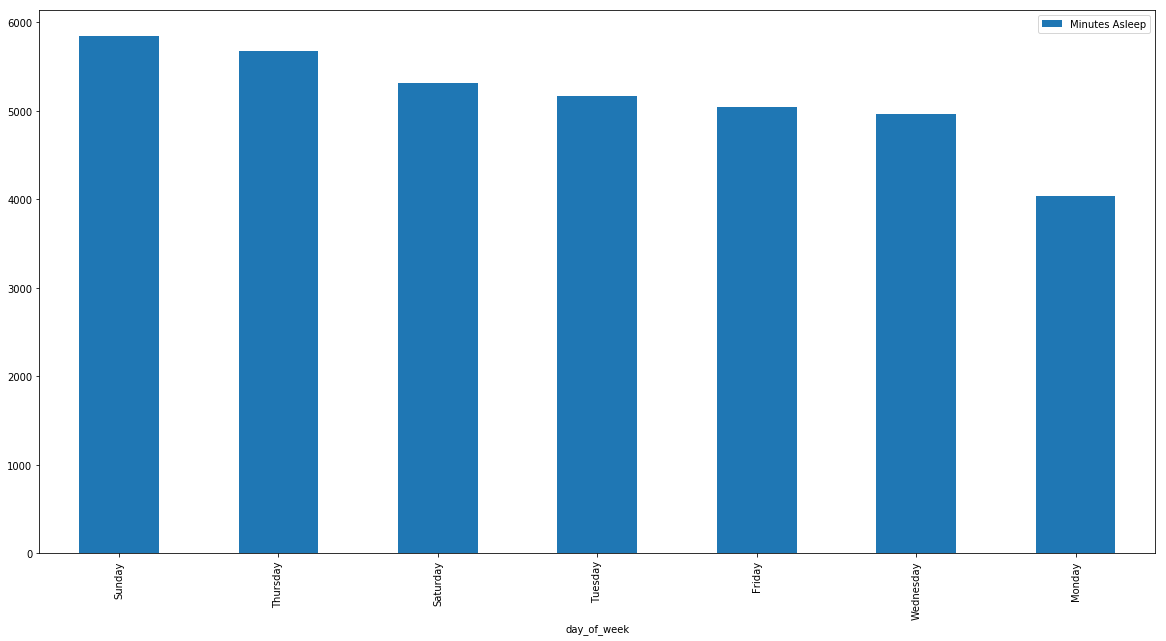

In [25]:
fall_sleep_sum.plot.bar(figsize=(20,10), fontsize=10)


In [26]:
fall_sleep_mean = fall_sleep.groupby(['day_of_week'])[['Minutes Asleep']].mean()
fall_sleep_mean = fall_sleep_mean.sort_values('Minutes Asleep', ascending=False)
fall_sleep_mean.head()

,Minutes Asleep
day_of_week,
Sunday,449.692308
Wednesday,413.666667
Saturday,408.307692
Monday,403.100000
Friday,387.615385


# I thought it could be more informative to look at my average sleep for each day of the week rather than my total sleep. I ended up finding slightly different results, though I still by far get the most sleep on Sundays.

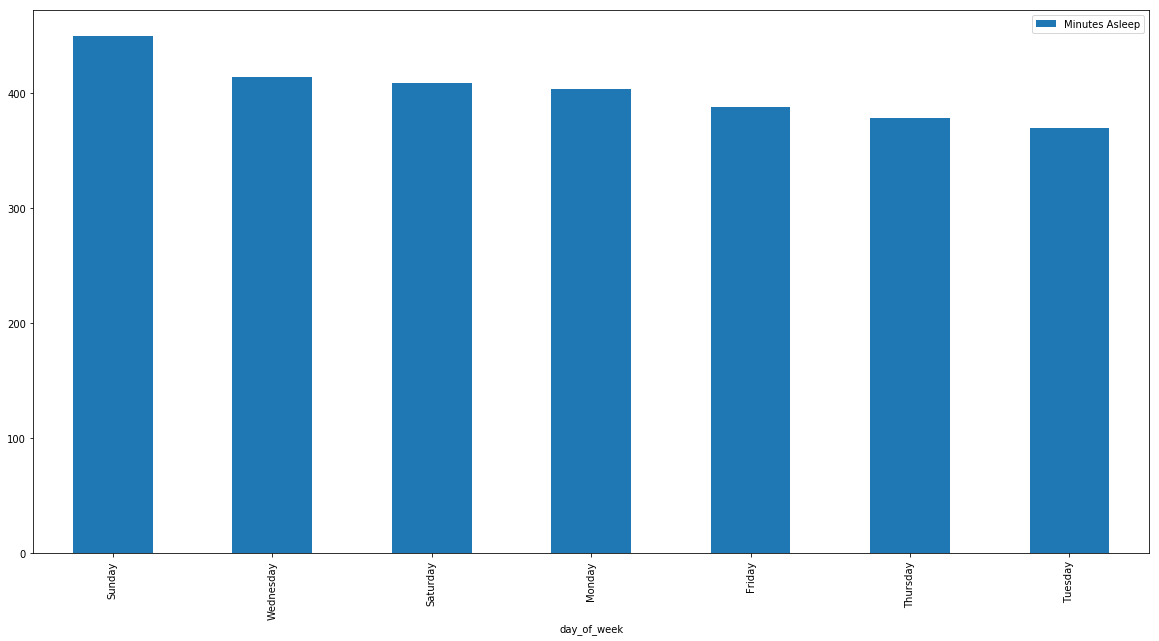

In [27]:
fall_sleep_mean.plot.bar(figsize=(20,10), fontsize=10)

#could put sum and average side by side to see difference?
#or plot both on one graph